# Fit patterns

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

In [30]:
laser_wavelength = 657e-6  # in mm
L = 0 # only for initialization

## Define functions for patterns of single and double slit

In [31]:
def single_slit_diffraction(x, x0, b, I0):
    """
    Intensity function for single-slit diffraction.
    
    Parameters:
    x : array-like
        Positions on the screen.
    x0 : float
        Position of the center of the slit.
    b : float
        Slit width.
    I0 : float
        Maximum intensity.
    
        
    Returns:
    Intensity values at positions x.
    """
    theta = np.arctan((x-x0)/L)
    beta = (b * np.sin(theta)) / laser_wavelength
    return I0 * np.sinc(beta)**2

def double_slit_interference(x, x0, h, b, I0):
    """
    Intensity function for double-slit interference pattern.
    
    Parameters:
    x : array-like
        Positions on the screen.
    x0 : float
        Position of the center of the slits.
    h : float
        Distance between the slits.
    b : float
        Slit width.
    I0 : float
        Maximum intensity.
        
    Returns:
    Intensity values at positions x.
    """
    theta = np.arctan((x-x0)/L)
    beta = (b * np.sin(theta)) / laser_wavelength
    alpha = (np.pi * h * np.sin(theta)) / laser_wavelength
    single_slit = np.sinc(beta)**2
    double_slit = np.cos(alpha)**2
    return I0 * single_slit * double_slit

In [32]:
def load_and_fit(fname, type='single'):
    data = np.load(f'./data/npz/{fname}.npz')
    x = data['x']
    I = data['I']

    I0_guess = np.max(I)
    x0_guess = x[np.argmax(I)]

    if type.lower() == 'single':
        b_guess = data['spec'][0]
        propt, pcov = curve_fit(single_slit_diffraction, x, I, p0=[x0_guess, b_guess, I0_guess],
                                bounds=([x0_guess-10, 0, 0], [x0_guess+10, 10, np.inf]))
        print(f"Fitted parameters:")
        # print(f"Displacement from center: {propt[0]:.4f}")
        print(f"Slit width (b): {propt[1]:.4f}")
        # print(f"Peak intensity: {propt[2]:.4f}")
        spec = f'{type} (b={b_guess}, L={L})'
        result_line = spec + f", b_fit={propt[1]:.4f}\n"


    elif type.lower() == 'double':
        b_guess = data['spec'][0]
        h_guess = data['spec'][1]
        propt, pcov = curve_fit(double_slit_interference, x, I, p0=[x0_guess, h_guess, b_guess, I0_guess], 
                                bounds=([x0_guess-10, 0, 0, 0], [x0_guess+10, 10, 10, np.inf]))
        print(f"Fitted parameters:")
        # print(f"Displacement from center: {propt[0]:.4f}")
        print(f"Slit width (b): {propt[2]:.4f}")
        print(f"Distance between slits (h): {propt[1]:.4f}")
        # print(f"Peak Intensity: {propt[3]:.4f}")
        spec = f'{type} (b={b_guess}, h={h_guess}, L={L})'
        result_line = spec + f", b_fit={propt[2]:.4f}, h_fit={propt[1]:.4f}\n"

    filepath = 'fitted_result.txt'
    if os.path.exists(filepath):
        with open(filepath, 'r') as f:
            lines = f.readlines()
    else:
        lines = []

    updated = False
    for i, line in enumerate(lines):
        if line.startswith(spec + ','):
            lines[i] = result_line  # Update the existing line
            updated = True
            break

    if not updated:
        lines.append(result_line)  # Append if not found

    with open(filepath, 'w') as f:
        f.writelines(lines)

    return [x, I], propt, pcov

def plot_fit(data, propt, type='single'):
    x, I = data
    fig, ax = plt.subplots()
    ax.plot(x-propt[0], I, label='Data')
    
    if type == 'single':
        fit_func = single_slit_diffraction
    elif type == 'double':
        fit_func = double_slit_interference
    
    x_fit = np.linspace(np.min(x), np.max(x), 1000)
    I_fit = fit_func(x_fit, *propt)
    
    ax.plot(x_fit-propt[0], I_fit, '-', label='Fit')
    ax.legend()
    ax.set_xlabel('Position on screen (mm)')
    ax.set_ylabel('Intensity (Lx)')
    ax.set_xlim((-10, 10))
    ax.set_ylim(bottom=0)

## Single slit

### b=0.1 / L=281

In [33]:
fname = 'single_0.1_281mm'

In [34]:
L = 281
data, propt, pcov = load_and_fit(fname, type='single')

Fitted parameters:
Slit width (b): 0.0978


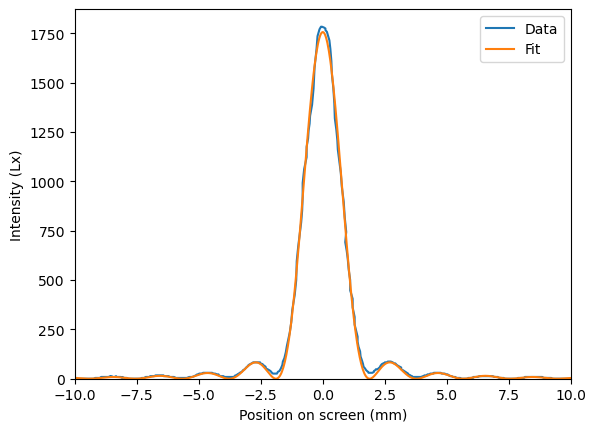

In [35]:
plot_fit(data, propt, type='single')

### b=0.1 / L=376

In [36]:
fname = 'single_0.1_376mm'

In [37]:
L = 376
data, propt, pcov = load_and_fit(fname, type='single')

Fitted parameters:
Slit width (b): 0.0975


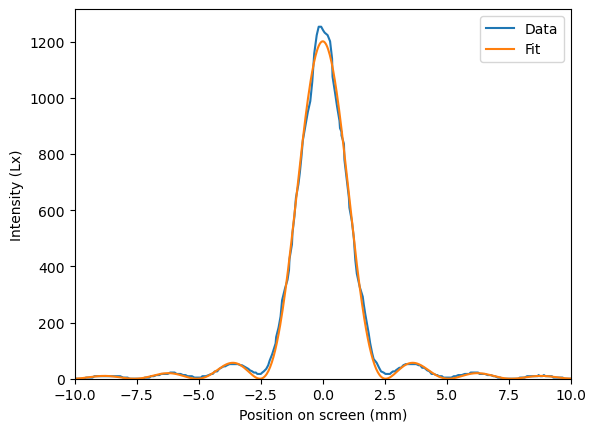

In [38]:
plot_fit(data, propt, type='single')

### b=0.2 / L=281

In [39]:
fname = 'single_0.2_281mm'

In [40]:
L = 281
data, propt, pcov = load_and_fit(fname, type='single')

Fitted parameters:
Slit width (b): 0.1871


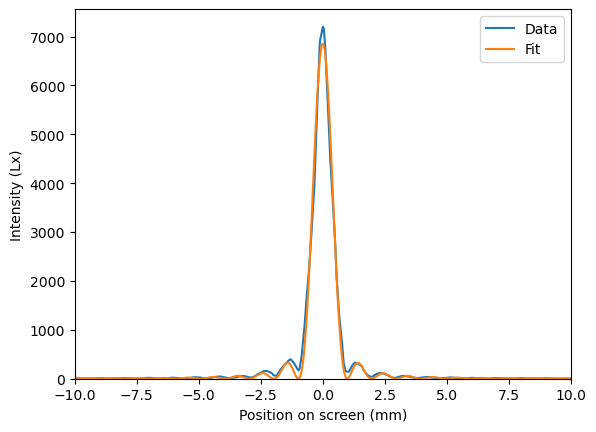

In [41]:
plot_fit(data, propt, type='single')

### b=0.2 / L=376

In [42]:
fname = 'single_0.2_376mm'

In [43]:
L = 376
data, propt, pcov = load_and_fit(fname, type='single')

Fitted parameters:
Slit width (b): 0.1938


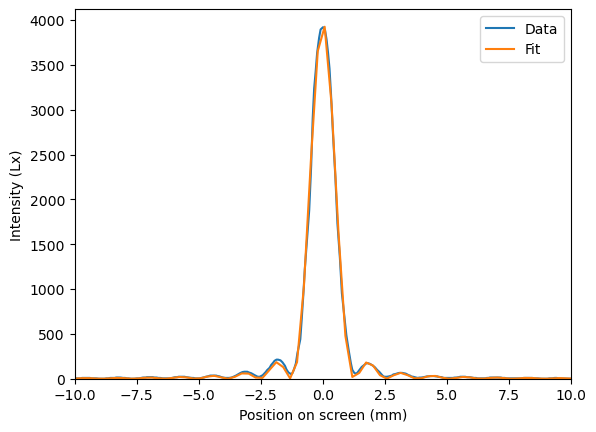

In [44]:
plot_fit(data, propt, type='single')

## Double slit

### b=0.1 / h=0.5 / L=291

In [45]:
fname = 'double_0.1,0.5_291mm'

In [46]:
L = 291
data, propt, pcov = load_and_fit(fname, type='double')

Fitted parameters:
Slit width (b): 0.0924
Distance between slits (h): 0.4380


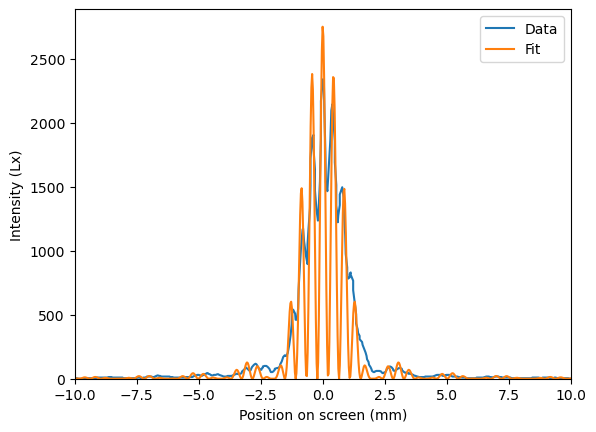

In [47]:
plot_fit(data, propt, type='double')

### b=0.1 / h=0.5 / L=378

In [48]:
fname = 'double_0.1,0.5_378mm'

In [49]:
L = 378
data, propt, pcov = load_and_fit(fname, type='double')

Fitted parameters:
Slit width (b): 0.0936
Distance between slits (h): 0.4844


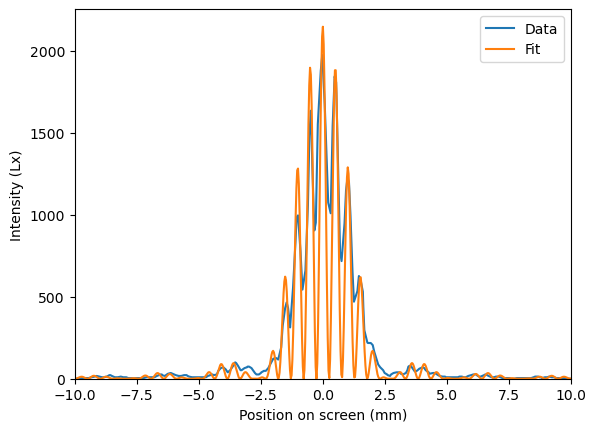

In [50]:
plot_fit(data, propt, type='double')

### b=0.05 / h=0.25 / L=159

In [51]:
fname = 'double_0.05,0.25_159mm'

In [52]:
L = 159
data, propt, pcov = load_and_fit(fname, type='double')

Fitted parameters:
Slit width (b): 0.0485
Distance between slits (h): 0.2430


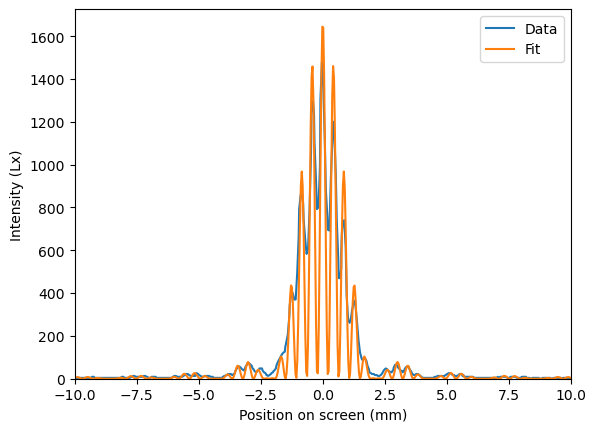

In [53]:
plot_fit(data, propt, type='double')

### b=0.05 / h=0.25 / L=244

In [54]:
fname = 'double_0.05,0.25_244mm'

In [55]:
L = 244
data, propt, pcov = load_and_fit(fname, type='double')

Fitted parameters:
Slit width (b): 0.0496
Distance between slits (h): 0.2447


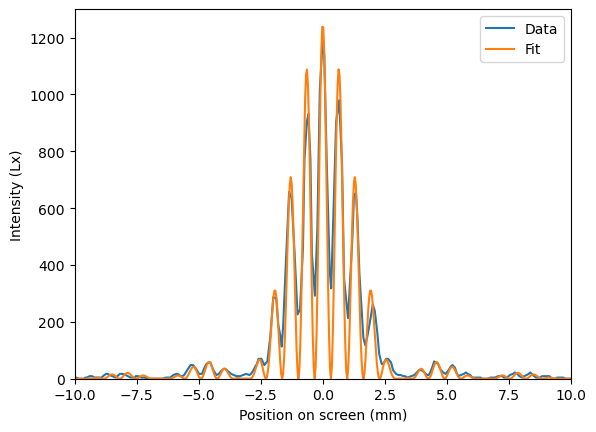

In [56]:
plot_fit(data, propt, type='double')